In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/roman2006/PycharmProjects/Liana Clone/Session_2/2_titanic_dataset.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  1. How many people died?

In [5]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
549/(549+342)

0.6161616161616161

### Knowledge found: 549 people died on the Titanic, a total of 61.6% of the passengers.

### 2. How many people died in first class?

In [7]:
sum([(df['Survived']==0) &(df['Pclass']==1)]).sum()

80

In [8]:
80/549

0.14571948998178508

### Knowledge found: 80 people died from first class, 14.6% of the people who died

### 3. How many people died in second class?

In [9]:
sum([(df['Survived']==0) &(df['Pclass']==2)]).sum()

97

In [10]:
97/549

0.1766848816029144

### Knowledge found: 97 people died from second class, 17.7% of the people who died

### 4. How many people died in third class?

In [11]:
sum([(df['Survived']==0) &(df['Pclass']==3)]).sum()

372

In [12]:
372/549

0.6775956284153005

### Knowledge found: 372 people died from third class, 67.75% of the people who died

### 5. What was the survivability of first class?

In [13]:
1-80/sum(df['Pclass']==1)

0.62962962962962965

### Knowledge found: The survivability rate of first class was of 63%

### 6. What was the survivability of second class?

In [14]:
1-97/sum(df['Pclass']==2)

0.47282608695652173

### Knowledge found: The survivability rate of first class was of 47.3%

### 7. Whatwas the survivability of third class?

In [15]:
1-372/sum(df['Pclass']==3)

0.24236252545824843

### Knowledge found: The survivability rate of first class was of 24.2%

### 8. What was the overall survibality?

In [16]:
1-549/(549+342)

0.38383838383838387

### Knowledge found: The overall survivability rate was of 38.4%

### 9. Gender rate of the people aboard the Titanic?

In [17]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
577/(577+314)

0.6475869809203143

In [19]:
314/(314+577)

0.35241301907968575

### Knowledge found: 35.2% aboard the titanic where femalea and 64.8% where male

### 10.Female overall death rate?

In [20]:
sum([(df['Survived']==0) &(df['Sex']=='female')]).sum()

81

In [21]:
81/549

0.14754098360655737

### Knowledge found: 14.8% of the dead where Female

### 11. First class female survivability?

In [22]:
sum([(df['Survived']==0) & (df['Sex']=='female') & (df['Pclass']==1) ]).sum()

3

In [23]:
1-3/314

0.9904458598726115

### Knowledge found: First class Females had a 99%  of survivability

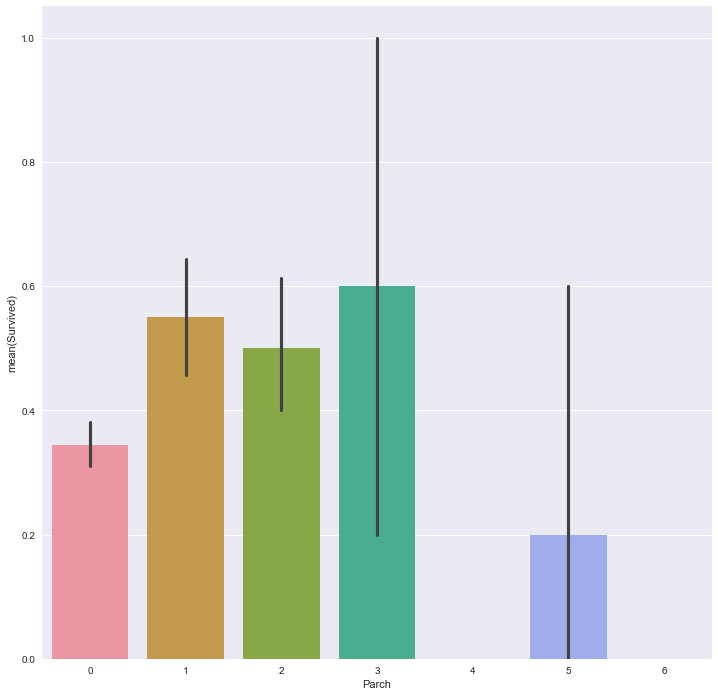

In [24]:
plt.figure(figsize=[12,12])
sns.barplot(x='Parch',y='Survived',data=df)
plt.show()

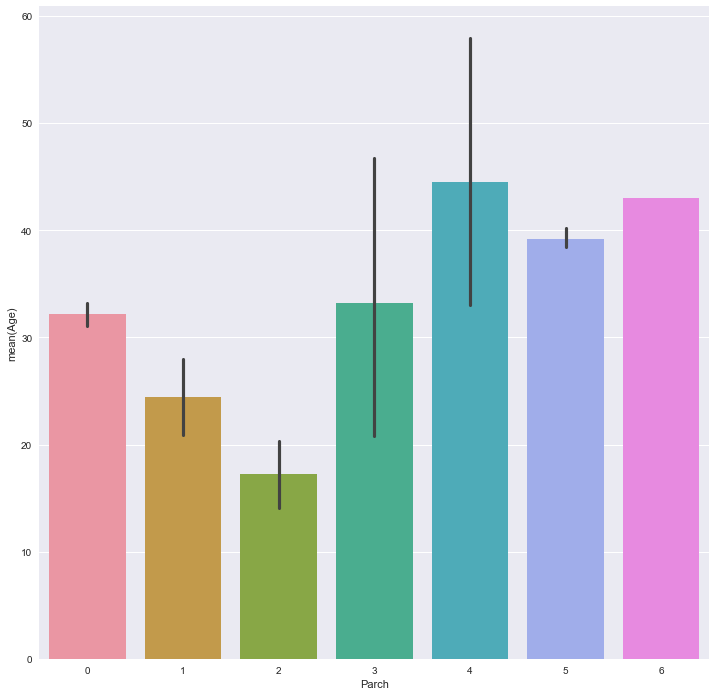

In [25]:
plt.figure(figsize=[12,12])
sns.barplot(x='Parch',y='Age',data=df)
plt.show()

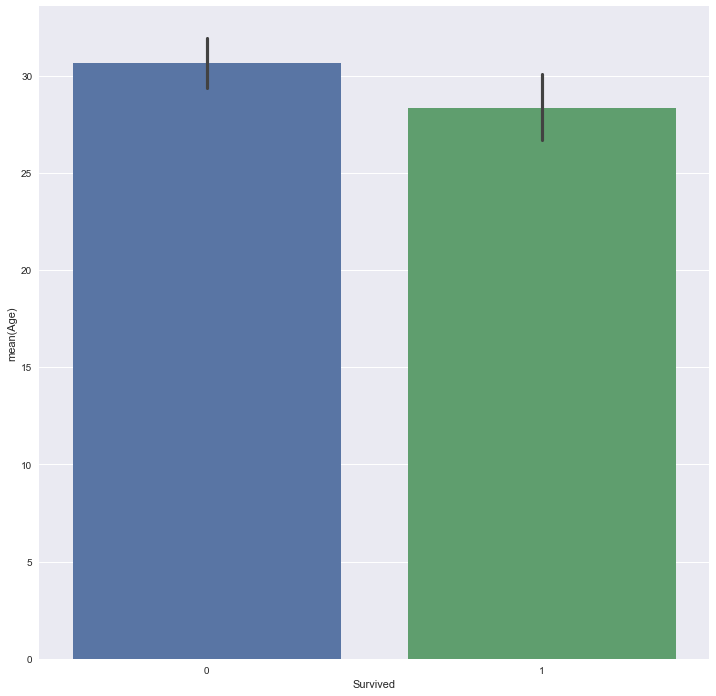

In [26]:
plt.figure(figsize=[12,12])
sns.barplot(x='Survived',y='Age',data=df)
plt.show()

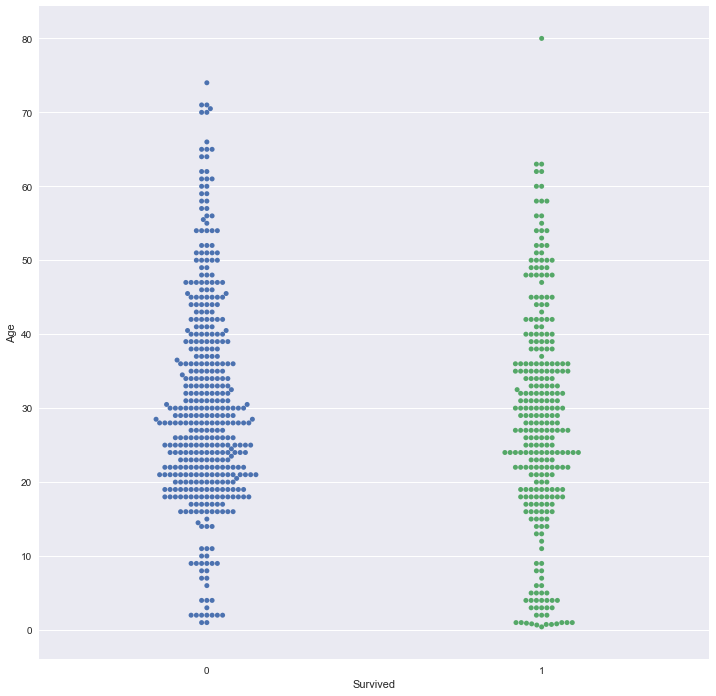

In [27]:
plt.figure(figsize=[12,12])
sns.swarmplot(x='Survived',y='Age',data=df)
plt.show()

In [28]:
import sqlite3
from sqlite3 import Error
import pandas as pd

In [29]:
def create_connection(db_file):
    """ 
    Create a database connection to the SQLite database specified by the db_file
    
    :param db_file: database file
    :return: the Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

In [30]:
# SUBSTITUTE THIS PATH BY THE CORRECT PATH ON YOUR LOCAL FILE SYSTEM
database = "/Users/roman2006/PycharmProjects/BTS_DataScienceFoundations/Session_3/Titanic.db"

# Create a database connection
conn = create_connection(database)

N = 10
query = "SELECT * FROM passengers"
df = pd.read_sql_query(query, conn)

conn.close()

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S


In [31]:
df.shape

(891, 12)

In [32]:
import re

In [33]:
# Define function to extract titles from passengers names 
def get_title(name):
    title_search = re.search ('([A-Za-z]+)\.', name)
    # if the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
        return ""
# create a new feature Title
df['Title']= df['Name'].apply(get_title)

In [48]:
df ['Title'].unique()

array([ 1.,  3.,  2.,  4.,  5.,  0.])

In [35]:
# Replace all rare titles by Rare
df['Title'] = df['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')


In [36]:
df.loc[df['Age'] <= 16,'NumericAge']=0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32),'NumericAge']=1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48),'NumericAge']=2
df.loc[(df['Age'] > 48) & (df['Age'] <= 60),'NumericAge']=3
df.loc[df['Age'] > 60,'NumericAge']=4



In [37]:
def get_person (passenger):
    age,sex = passenger
    return 'child'if age <16 else sex
df['Person'] =df[['Age','Sex']].apply(get_person,axis=1)

In [38]:
df['Sex']=df['Sex'].map({'female':0,'male':1}).astype(int)

title_mapping ={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
df['Title']=df['Title'].map(title_mapping)
df['Title']= df['Title'].fillna(0)

In [41]:
df[["Person",'Survived']].groupby(['Person'], as_index=False).mean()

,Person,Survived
0,child,0.590361
1,female,0.756458
2,male,0.163873


In [47]:
df.groupby(['Person','Embarked']).agg({'Age':'mean','Survived':'sum'})[['Age','Survived']].reset_index()

,Person,Embarked,Age,Survived
0,child,C,8.245556,14
1,child,Q,7.200000,1
2,child,S,5.737500,34
3,female,,50.000000,2
4,female,C,33.750000,53
5,female,Q,25.136364,26
6,female,S,31.716561,124
7,male,C,34.960938,26
8,male,Q,39.500000,3
9,male,S,32.608309,59
